In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import joblib


In [3]:
import pandas

## Data Exploratory Analysis

In [4]:
df = pd.read_csv("employee_attrition_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [5]:
df.tail()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.940510,159,0,73220,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [7]:
df.shape

(1000, 11)

In [8]:
df.size

11000

In [9]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [10]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [11]:
df.isna()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [14]:
df.duplicated().sum()

0

In [15]:
df["Gender"].unique

<bound method Series.unique of 0        Male
1      Female
2      Female
3      Female
4      Female
        ...  
995    Female
996      Male
997      Male
998    Female
999      Male
Name: Gender, Length: 1000, dtype: object>

In [16]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [17]:
df.drop(columns="Employee_ID")

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
...,...,...,...,...,...,...,...,...,...,...
995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1


In [18]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [19]:
df.drop(columns="Employee_ID", inplace=True)


In [20]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [21]:
df["Gender"].value_counts()


Gender
Male      506
Female    494
Name: count, dtype: int64

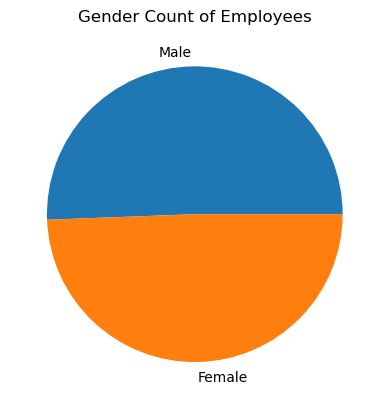

In [22]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Gender Count of Employees")
plt.show()

In [23]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [24]:
df.groupby("Job_Title")["Salary"].mean()

Job_Title
Accountant       64330.412621
Analyst          66009.384615
Engineer         64440.163551
HR Specialist    62724.407821
Manager          65452.529126
Name: Salary, dtype: float64

In [25]:
df.groupby("Job_Title")["Salary"].mean().sort_values(ascending = False)

Job_Title
Analyst          66009.384615
Manager          65452.529126
Engineer         64440.163551
Accountant       64330.412621
HR Specialist    62724.407821
Name: Salary, dtype: float64

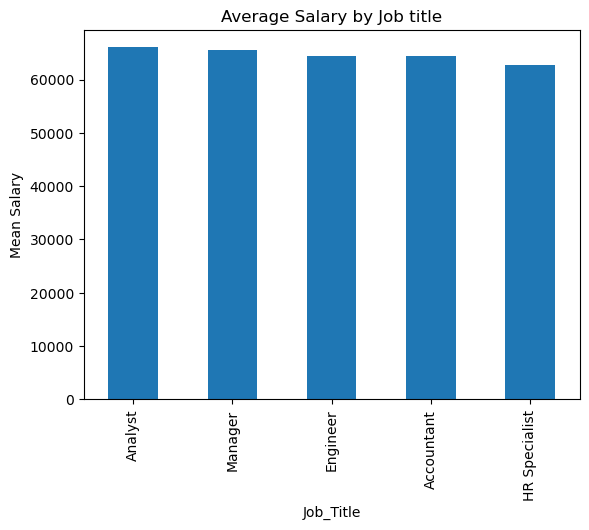

In [26]:
df.groupby("Job_Title")["Salary"].mean().sort_values(ascending = False).plot(kind="bar")
plt.title("Average Salary by Job title")
plt.ylabel("Mean Salary")
plt.show()

In [27]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [28]:
df[["Department", "Promotion_Last_5Years", "Salary"]].head()

,Department,Promotion_Last_5Years,Salary
0,Marketing,0,60132
1,Sales,1,79947
2,Marketing,0,46958
3,Engineering,0,40662
4,Sales,1,74307


In [29]:
df.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean()

Department   Promotion_Last_5Years
Engineering  0                        65541.063636
             1                        62424.127660
Finance      0                        63390.145299
             1                        62041.269663
HR           0                        63012.556701
             1                        65882.861702
Marketing    0                        65251.597826
             1                        66018.632653
Sales        0                        64295.846939
             1                        67838.756757
Name: Salary, dtype: float64

In [30]:
df.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [31]:
df.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [32]:
df["Salary"].describe()

count     1000.000000
mean     64624.980000
std      20262.984333
min      30099.000000
25%      47613.500000
50%      64525.000000
75%      81921.000000
max      99991.000000
Name: Salary, dtype: float64

In [33]:
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [34]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


## Feature Engineering and Building predictive model

In [35]:
X = df[["Years_at_Company", "Satisfaction_Level","Average_Monthly_Hours"]]
y = df["Salary"]

In [36]:
X.head()

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229


In [37]:
y.head()

0    60132
1    79947
2    46958
3    40662
4    74307
Name: Salary, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
X

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[ 0.8718202 , -1.43835147, -0.24760892],
       [ 0.51796117, -1.64613485, -0.01074354],
       [ 0.16410213,  0.62426324, -1.02588089],
       ...,
       [-1.60519306, -1.7405953 , -1.53344956],
       [ 0.16410213,  1.64679779,  1.5458004 ],
       [-0.89747498,  1.57648455,  1.57963831]])

In [42]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [43]:
X_test = scaler.fit_transform(X_test)

In [44]:
X_test

array([[ 1.48036798,  1.07839115,  1.3329142 ],
       [ 1.12105536, -0.07511558, -0.60927959],
       [ 0.76174275, -1.3960876 ,  1.6342891 ],
       [ 0.76174275,  0.87107176, -1.17854328],
       [ 1.12105536,  1.34149046,  1.5003447 ],
       [ 1.48036798,  1.72578188, -1.44643208],
       [-1.75344557, -0.74629619, -0.47533519],
       [ 0.76174275,  1.26303972, -0.47533519],
       [-1.75344557,  0.60827695,  0.26135901],
       [ 0.04311751, -1.26663662, -1.14505718],
       [-1.03482034,  0.40979171, -0.20744639],
       [ 0.04311751,  1.2981421 , -1.31248768],
       [ 0.04311751,  0.97543829, -0.94414058],
       [-1.75344557,  1.45489944, -1.64734868],
       [ 0.04311751,  1.10639864,  0.99805321],
       [-1.39413295, -1.46202025,  1.4668586 ],
       [-1.39413295, -0.74926019,  1.4333725 ],
       [ 1.48036798, -0.06765106, -0.81019619],
       [ 0.40243013,  1.14362   , -0.97762668],
       [ 1.12105536,  1.40477255,  0.93108101],
       [ 0.76174275, -0.07884986, -0.475

In [45]:
X_test.shape

(200, 3)

## MACHINE LEARNING MODEL

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def results(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root Mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
lr.predict(X_test)

array([63342.86830717, 65895.02769273, 63861.1589876 , 66029.73275684,
       62947.46686589, 66160.72515229, 65249.63195919, 65081.2196939 ,
       63855.86250022, 66703.33180022, 64656.78828604, 65802.53033727,
       65529.49166217, 65620.61721901, 63313.13226355, 63489.74628809,
       63224.8989104 , 66213.00668452, 65593.07032051, 63553.99787117,
       65649.97976932, 62782.90743643, 65359.40864704, 65942.99573356,
       64759.28063017, 63827.62435767, 66551.09058714, 65700.72101741,
       64718.5776337 , 66138.41477846, 67284.58960724, 64438.78320851,
       66136.06889622, 64423.86371647, 64628.68906552, 64531.33473474,
       64451.23781316, 62867.33042372, 65151.84759168, 65675.43591983,
       62998.10677547, 65937.37983917, 66381.89222535, 64162.91562213,
       63769.51520381, 64215.95786308, 63641.38839833, 63567.53394079,
       63397.80791515, 64197.93398197, 63395.41084069, 64883.99286792,
       65570.44121551, 65095.5670813 , 63533.45669249, 66749.27087615,
      

In [50]:
predictionslr =lr.predict(X_test)

In [51]:
results(predictionslr)

Mean absolute error on model is 15888.42334997573
Root Mean squared error on model is 18465.964375673957


In [52]:
from sklearn.linear_model import Ridge
rr = Ridge()

rr.fit(X_train, y_train)

Ridge()

In [53]:
predictionsrr =rr.predict(X_test)
results(predictionsrr)

Mean absolute error on model is 15888.523955487768
Root Mean squared error on model is 18465.997685592414


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [55]:
svrmodel = SVR()

In [56]:
param_gridsvr = {"C": [0.01, 0.1,0.5], "degree":[2,3,4], "kernel":["linear", "rbf", "poly"]}

In [57]:
gridsvr =GridSearchCV(svrmodel, param_gridsvr)

In [58]:
gridsvr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [59]:
gridsvr.best_params_

{'C': 0.5, 'degree': 4, 'kernel': 'poly'}

In [60]:
predictionssvr = gridsvr.predict(X_test)

In [61]:
results(predictionssvr)

Mean absolute error on model is 16039.813566643195
Root Mean squared error on model is 18576.072001034325


In [62]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [63]:
param_gridrfr = {"n_estimators": [2,3,4,5,6], "max_depth":[5,10,15]}

In [64]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [65]:
gridrfr.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [66]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [67]:
predictions_of_rfr = gridrfr.predict(X_test)

In [68]:
results(predictions_of_rfr)

Mean absolute error on model is 16366.54245185049
Root Mean squared error on model is 19124.820582859382


In [69]:
lr

LinearRegression()

In [70]:
joblib.dump(lr, "model.pkl")

['model.pkl']

In [71]:
X.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')